In [1]:
import gzip, pickle, matplotlib as mpl, matplotlib.pyplot as plt
from pathlib import Path
from urllib.request import urlretrieve
from itertools import islice
from torch import tensor

In [5]:
mpl.rcParams['image.cmap'] = 'gray'

In [7]:
data_url = 'https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data/')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [8]:
if not path_gz.exists(): urlretrieve(data_url, path_gz)

In [13]:
with gzip.open(path_gz, mode='rb') as f:
    (X_train, y_train), (X_valid, y_valid), _ = pickle.load(f, encoding='latin-1')

In [17]:
img = list(X_train[5])
len(img)

784

In [25]:
def slice_list(l, d0):
    it = iter(l)
    for i in range(0, len(l), d0): yield list(islice(it, d0))

In [26]:
lst = img[200:209]

In [52]:
class MyTensor():
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idx): return self.xs[idx[0]][idx[1]]
    def slice_xs(self, n): 
        it=iter(self.xs)
        m = len(self.xs)//n
        self.xs = list(iter(lambda: list(islice(it, m)), []))

In [53]:
img_tens = MyTensor(img)
img_tens.slice_xs(28)

In [54]:
img_tens[(10, 10)]

0.984375

In [68]:
img = tensor(img).view(-1, 28, 28)

/tmp/ipykernel_550/515937519.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = tensor(img).view(-1, 28, 28)


In [69]:
img.shape

torch.Size([1, 28, 28])

In [74]:
X_train, y_train, X_valid, y_valid = tuple(map(tensor, [X_train, y_train, X_valid, y_valid]))
X_train, X_valid = X_train.view(-1, 28, 28), X_valid.view(-1, 28, 28)

/tmp/ipykernel_550/837984475.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train, y_train, X_valid, y_valid = tuple(map(tensor, [X_train, y_train, X_valid, y_valid]))


In [75]:
X_train.shape

torch.Size([50000, 28, 28])

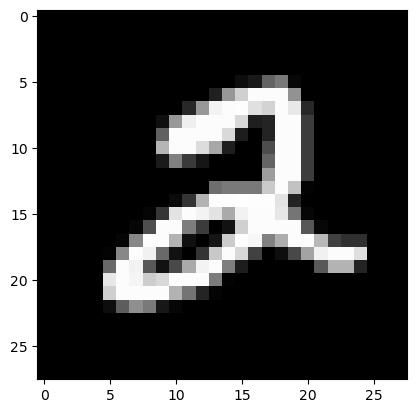

In [76]:
plt.imshow(X_train[5], )

<br><br>Random number generator

In [94]:
rand_state = None
def seed(a):
    global rand_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rand_state = x+1, y+1, z+1

In [101]:
seed(457428938475)
rand_state

(4976, 20238, 499)

In [96]:
def rand():
    global rand_state
    x, y, z = rand_state
    x = (x * 171) % 30269
    y = (y * 172) % 30307
    z = (z * 170) % 30323
    rand_state = x, y, z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [104]:
rand()

0.06912886811267205

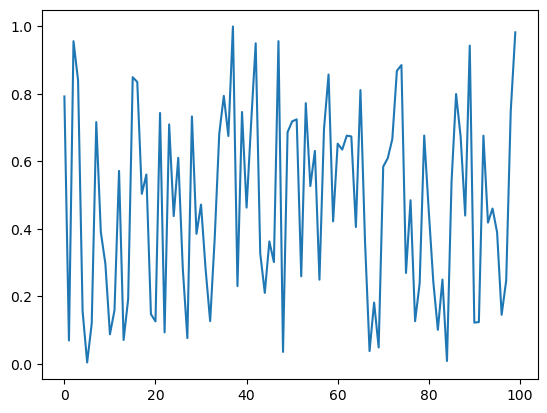

In [98]:
plt.plot([rand() for i in range(100)])

(array([10088.,  9982.,  9649., 10026.,  9881.,  9946., 10210., 10238.,
         9876., 10104.]),
 array([3.03151161e-06, 1.00002646e-01, 2.00002261e-01, 3.00001876e-01,
        4.00001490e-01, 5.00001105e-01, 6.00000720e-01, 7.00000335e-01,
        7.99999949e-01, 8.99999564e-01, 9.99999179e-01]),
 <BarContainer object of 10 artists>)

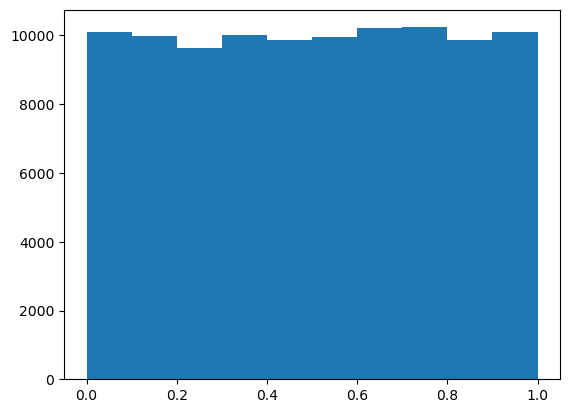

In [107]:
plt.hist([rand() for i in range(100000)])

In [42]:
rand_state

(17290, 197, 65)

In [109]:
%timeit -n 10 [rand() for _ in range(10000)]

3.77 ms ± 539 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [112]:
import torch

In [119]:
%timeit -n 10 [torch.rand(1) for _ in range(10000)]

17.8 ms ± 932 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [122]:
%timeit -n 10 torch.rand(100, 100)

98.1 µs ± 56.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [118]:
torch.rand(1)

tensor([0.9216])